#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [ ]:
first_name= "Sajjad"
last_name= "Hashembeiki"
student_number= "98107077"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

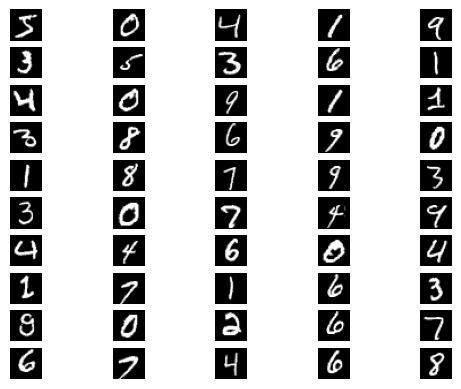

In [ ]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    # inputs dataset and number of images wants to show
    # output plot images
    fig , ax = plt.subplots(10,5)
    for i in range(10):
      for j in range(5):
        ax[i][j].imshow(X[i*10+j] , cmap=  'gray')
        ax[i][j].axis('off')
show_images(50,X = x_train)

In [ ]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train_normalized = x_train/255
x_test_normalized = x_test/255
# reshape the images to 784D vectors
X_train = x_train_normalized.reshape(-1,784)
X_test = x_test_normalized.reshape(-1,784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [ ]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
cov_matrix = np.cov(X_train.T)
eigen_values , eigen_vectors = np.linalg.eig(cov_matrix)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [ ]:
explained_variance = 0.8 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
#TODO
cumsum_array = np.cumsum(eigen_values)
variance_of_k_component = cumsum_array/eigen_values.sum()
number_of_components = np.array(np.where(variance_of_k_component > explained_variance))[0,0] + 1
#calculate the compression_ratio
compression_ratio = 784/number_of_components
print('number of components:',number_of_components)
print('compression_ratio' , compression_ratio)

number of components: 44
compression_ratio 17.818181818181817


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

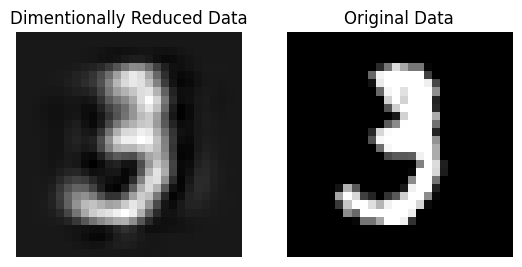

In [ ]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
#plot the dimentionally reduced data
#plot the original data


# select k=number_of_components components(PCs)
V = eigen_vectors[:,:number_of_components]
# reduction to 11D space
F = np.matmul(X_train , V)
# Reproject Images to Standard Basis
X_k = np.matmul(F , V.T)

#plot the dimentionally reduced data
fig , ax = plt.subplots(1,2)
ax[0].imshow(X_k[10].reshape(28,28) ,cmap = 'gray' )
ax[0].axis('off')
ax[0].title.set_text('Dimentionally Reduced Data')
#plot the original data
ax[1].imshow(X_train[10].reshape(28,28) ,cmap = 'gray' )
ax[1].axis('off')
ax[1].title.set_text('Original Data')

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [ ]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  pca = PCA(n_components = n_components)
  data_reduced = pca.fit_transform(data)
  return data_reduced

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = SVC()
    clf.fit(X_train , y_train)
    acc = clf.score(X_test,y_test)
    return acc

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []
X = x_train.reshape(-1,784)
for pc in tqdm(range(2,101)):
    #TODO
    X_reduced = do_pca(pc, X)
    acc = ML_model(X_reduced , y_train)
    pc_list.append(pc)
    acc_list.append(acc)

100%|██████████| 99/99 [1:10:10<00:00, 42.53s/it]


Text(0.5, 1.0, 'Accuracy based on Number of Components')

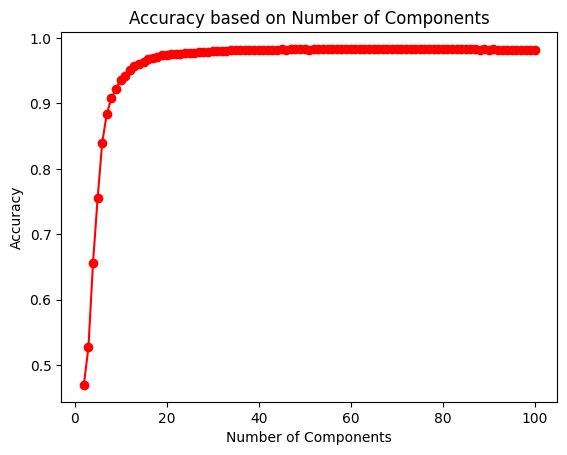

In [ ]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list , acc_list , 'r-o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy based on Number of Components')

In [ ]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO


In [ ]:
pc_list

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [ ]:
acc_list

[0.4696666666666667,
 0.5270833333333333,
 0.6565833333333333,
 0.7549166666666667,
 0.84025,
 0.8843333333333333,
 0.90775,
 0.9224166666666667,
 0.9363333333333334,
 0.9421666666666667,
 0.95125,
 0.9569166666666666,
 0.9605833333333333,
 0.9630833333333333,
 0.9678333333333333,
 0.96925,
 0.9708333333333333,
 0.9735,
 0.9741666666666666,
 0.9749166666666667,
 0.9755833333333334,
 0.9751666666666666,
 0.9764166666666667,
 0.9768333333333333,
 0.9778333333333333,
 0.9785,
 0.9786666666666667,
 0.9793333333333333,
 0.9795833333333334,
 0.9805,
 0.9806666666666667,
 0.9805833333333334,
 0.9815833333333334,
 0.9810833333333333,
 0.9816666666666667,
 0.9816666666666667,
 0.9816666666666667,
 0.98175,
 0.9815833333333334,
 0.9815,
 0.982,
 0.9818333333333333,
 0.9821666666666666,
 0.9826666666666667,
 0.9823333333333333,
 0.98275,
 0.98275,
 0.9825833333333334,
 0.9825,
 0.9823333333333333,
 0.9828333333333333,
 0.98275,
 0.98275,
 0.983,
 0.983,
 0.98275,
 0.98325,
 0.9828333333333333,
 0